<a href="https://colab.research.google.com/github/ajinshanid/netflix_data_analysis-/blob/main/Netflix_Basic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Libraries requried
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# Upload Netflix CSV File
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [3]:
# Load the Uploaded Dataset
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


/tmp/ipython-input-15-502613934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


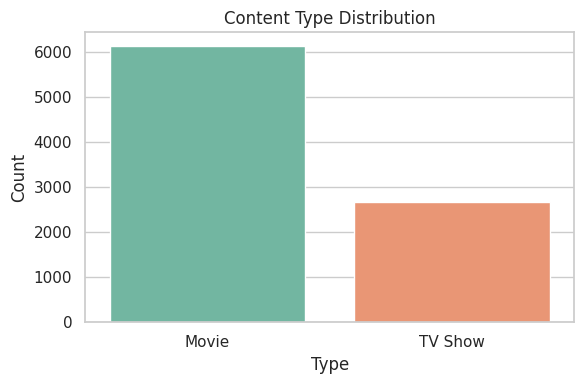

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Content Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



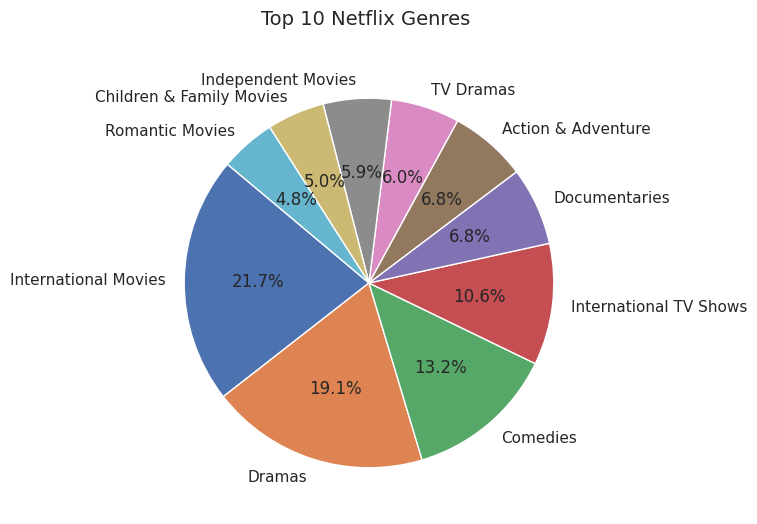

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 genres
top_genres = df['listed_in'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_genres.values, labels=top_genres.index, autopct='%1.1f%%', startangle=140)

# Add title with simple padding
plt.title("Top 10 Netflix Genres ", fontsize=14, pad=20)

# Show the chart
plt.show()


/tmp/ipython-input-17-3022220528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')


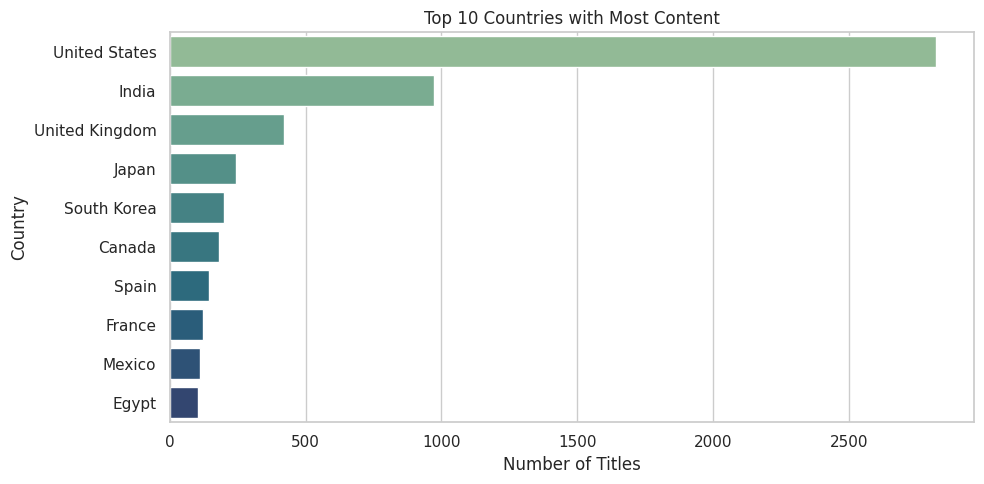

In [ ]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [ ]:
# Check structure
df.info()

# Check for null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with nulls in critical columns (like title and type)
df.dropna(subset=['title', 'type'], inplace=True)

# Fill or impute remaining columns
df['director'].fillna('Not Available', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Not Specified', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Not Available', inplace=True)


/tmp/ipython-input-19-2078716028.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Not Available', inplace=True)
/tmp/ipython-input-19-2078716028.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
# Total missing values BEFORE vs AFTER
print("Missing values (after cleaning):")
print(df.isnull().sum())


Missing values (after cleaning):
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [12]:
import pandas as pd
from IPython.display import display

# Define placeholder values for imputation
placeholders = {
    'director':     'Not Available',
    'cast':         'Not Available',
    'country':      'Not Specified',
    'rating':       'Not Rated',
    'duration':     'Unknown',
    'date_added':   'Not Available'
}

# Fill missing values in the DataFrame using placeholders
for col, val in placeholders.items():
    df[col].fillna(val, inplace=True)

# Collect a preview of up to each row per placeholder column
placeholder_rows = []

for col, val in placeholders.items():
    match = df[df[col] == val].copy()
    if not match.empty:
        match = match.sample(n=min(1, len(match)), random_state=1)  # random 6 rows or fewer
        match['Placeholder Column'] = col
        match['Placeholder Value'] = val
        placeholder_rows.append(match)

# Combine sampled rows
imputed_preview_df = pd.concat(placeholder_rows, ignore_index=True)

# Display the preview
print("✅ Preview of Rows Containing Placeholder Values :")
display(imputed_preview_df)


✅ Preview of Rows Containing Placeholder Values (Up to 1 per column):


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Placeholder Column,Placeholder Value
0,s5934,TV Show,The Borgias,Not Available,"Jeremy Irons, François Arnaud, Holliday Graing...","United States, Hungary, Ireland, Canada","February 1, 2014",2013,TV-MA,3 Seasons,TV Dramas,Follow the lives of the notorious Borgia famil...,director,Not Available
1,s8605,TV Show,Top 10 Secrets and Mysteries,Not Available,Not Available,"United Kingdom, United States, Czech Republic","March 15, 2019",2018,TV-14,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This series investigates mysteries that persis...,cast,Not Available
2,s7761,TV Show,Power Battle Watch Car,Not Available,"Sang-hyun Um, Tae-yeol Jeon, Yeong-wung Jeong,...",Not Specified,"June 1, 2017",2016,TV-Y7,1 Season,"Kids' TV, Korean TV Shows","Jino and his Watch Car, Bluewill, compete in t...",country,Not Specified
3,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Rated,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",rating,Not Rated
4,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,Unknown,Movies,"Louis C.K. muses on religion, eternal love, gi...",duration,Unknown
5,s6796,TV Show,Frasier,Not Available,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,Not Available,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,date_added,Not Available


In [14]:
# Export to Excel
df.to_excel("netflix_cleaned.xlsx", index=False)

# Download Excel file in Colab
from google.colab import files
files.download("netflix_cleaned.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>